In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [5]:
plt.style.use('seaborn-white')

In [6]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [7]:
path_to_data="../data/"
path_to_results="../results/"

In [8]:
plt_df=pd.read_csv(path_to_data+"Data_for_Fig3B_3C.tsv",sep="\t",index_col=0)
plt_df

,HRD_score,MSK_Sig3_ratio,Gender_sTP53m,HA_cases
TCGA-OR-A5J1,7.0,1.433782e-01,Male_TP53wt,0.0
TCGA-OR-A5J2,9.0,1.467526e-08,Female_TP53m,0.0
TCGA-OR-A5J3,0.0,1.048371e-01,Female_TP53wt,0.0
TCGA-OR-A5J4,47.0,3.705027e-01,Female_TP53wt,0.0
TCGA-OR-A5J5,8.0,1.515037e-11,Male_TP53m,0.0
...,...,...,...,...
TCGA-YZ-A980,2.0,2.308555e-01,Male_TP53wt,0.0
TCGA-YZ-A982,4.0,2.001896e-01,Female_TP53wt,0.0
TCGA-YZ-A983,1.0,2.210637e-01,Female_TP53wt,0.0
TCGA-YZ-A984,9.0,6.408633e-06,Female_TP53wt,0.0


Female_TP53m rS= 0.481 p= 5.30e-111
Male_TP53m rS= 0.122 p= 2.19e-07
Female_TP53wt rS= 0.109 p= 1.96e-09
Male_TP53wt rS= 0.025 p= 1.79e-01


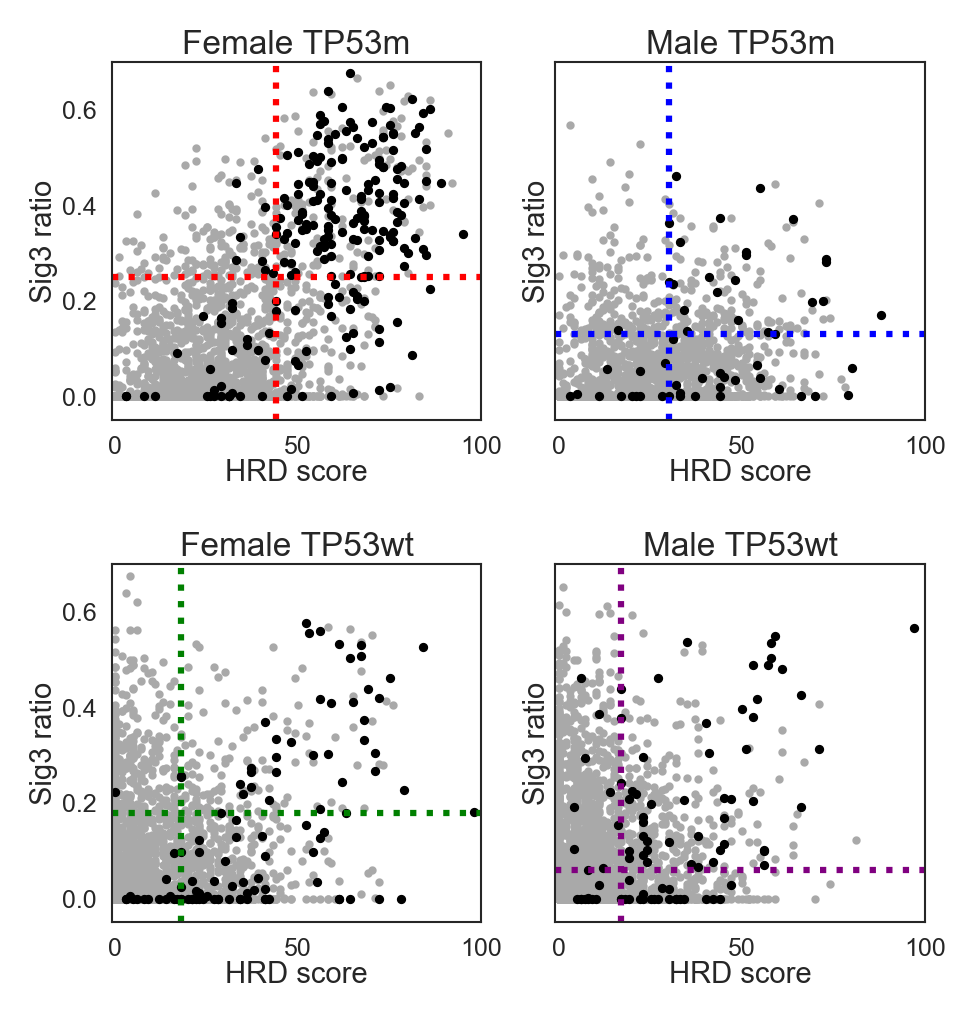

In [14]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']

val1="HRD_score"
val2="MSK_Sig3_ratio"
fig=plt.figure(figsize=(3.5,3.8))
rSs,pvals=[],[]
for i,group in enumerate(groups) :
    ax=fig.add_subplot(2,2,i+1)
    plt_df2=plt_df[ (plt_df["Gender_sTP53m"]==group)&(plt_df["HA_cases"]==0)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    ax.scatter(x,y,c="darkgrey",s=1)
    
    plt_df2=plt_df[ (plt_df["Gender_sTP53m"]==group)&(plt_df["HA_cases"]==1)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    ax.scatter(x,y,c="black",s=1.5)
    
    ax.axvline(x=cutoffs[i],ls="dotted",c=colors[i],lw=1.5)
    ax.axhline(y=cutoffs2[i],ls="dotted",c=colors[i],lw=1.5)
    
    ax.set_xlim(-1,100)
    ax.set_ylim(-0.05,0.7)
    ax.set_title(labels[i],fontsize=8,y=1.0, pad=2)
    ax.set_xlabel("HRD score",fontsize= SMALL_SIZE,labelpad=0)
    ax.set_ylabel("Sig3 ratio",fontsize=SMALL_SIZE,labelpad=1)
    
    if i in [1,3]:
        #ax.set_ylabel("")
        ax.set_yticks([])
        
    ax.tick_params(labelsize=6)
    
    plt_df2=plt_df[ (plt_df["Gender_sTP53m"]==group)]
    x=plt_df2[val1]
    y=plt_df2[val2]
    r,p=stats.spearmanr(x,y,nan_policy="omit")
    rS="{:.3f}".format(r)
    pval="{:.2e}".format(p)
    print(group, "rS=", rS, "p=", pval)
    rSs.append(rS)
    pvals.append(pval)
    
plt.subplots_adjust(hspace=0.4)
plt.savefig(path_to_results+"Figure3B.png",bbox_inches="tight")

In [9]:
from sklearn.metrics import roc_curve,roc_auc_score

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC =((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))**0.5
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

[44. 30. 18. 17.]
[[0.184 0.825]
 [0.399 0.778]
 [0.248 0.853]
 [0.255 0.8  ]]
[0.876 0.73  0.874 0.826]
[[0.845 0.907]
 [0.652 0.808]
 [0.829 0.918]
 [0.773 0.879]]


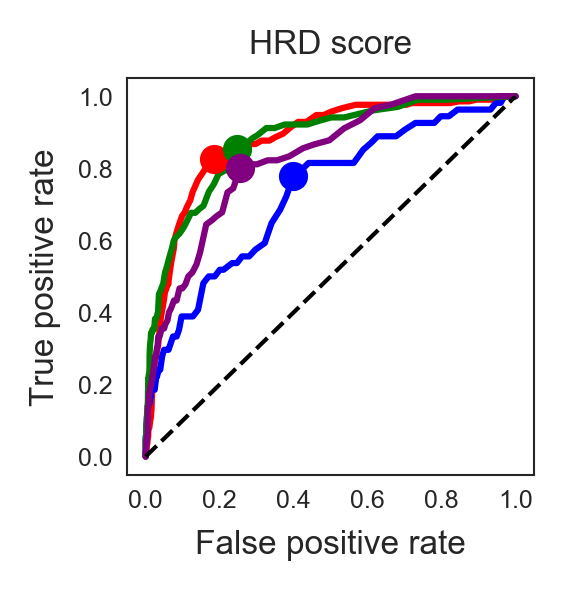

In [19]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
colors=["red","blue","green","purple"]
cutoffs,optimals,aucs,cis=[],[],[],[]

fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
for i,group in enumerate(groups) :
    plt_df2=plt_df[ plt_df["Gender_sTP53m"]==group]
    plt_df2=plt_df2.dropna(subset=["HA_cases","HRD_score"])
    y_true=np.array(plt_df2["HA_cases"])
    y_score=np.array(plt_df2["HRD_score"])
    w=[0.1 if x==0 else 0.9 for x in y_true ]
    fpr, tpr, thresholds = roc_curve(y_true, y_score,sample_weight=w )   
    auc = np.round( roc_auc_score(y_true, y_score),3)
    ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
    ax.plot(fpr,tpr,c=colors[i],ls="-",label=labels[i])
    optimal_idx = np.argmax(tpr - fpr)
    optimals.append( [fpr[optimal_idx],tpr[optimal_idx]] )
    cutoffs.append( thresholds[optimal_idx])
    aucs.append(auc)
    cis.append( (ci1,ci2) )
    
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)
ax.legend(bbox_to_anchor=(1, 1), fontsize=MEDIUM_SIZE,labels=labels)

for i,point in enumerate(optimals):
    ax.plot( point[0],point[1],c=colors[i],marker="o")
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("HRD score",fontsize=MEDIUM_SIZE)
ax.legend([])
plt.savefig(path_to_results+"Figure3C_1.png",bbox_inches="tight")

print(np.round(cutoffs,3))
print(np.round(optimals,3))
print(np.round(aucs,3))
print(np.round(cis,3))

[0.249 0.131 0.178 0.061]
[[0.164 0.711]
 [0.173 0.444]
 [0.143 0.392]
 [0.381 0.656]]
[0.819 0.629 0.631 0.621]
[[0.784 0.855]
 [0.548 0.71 ]
 [0.572 0.69 ]
 [0.559 0.684]]


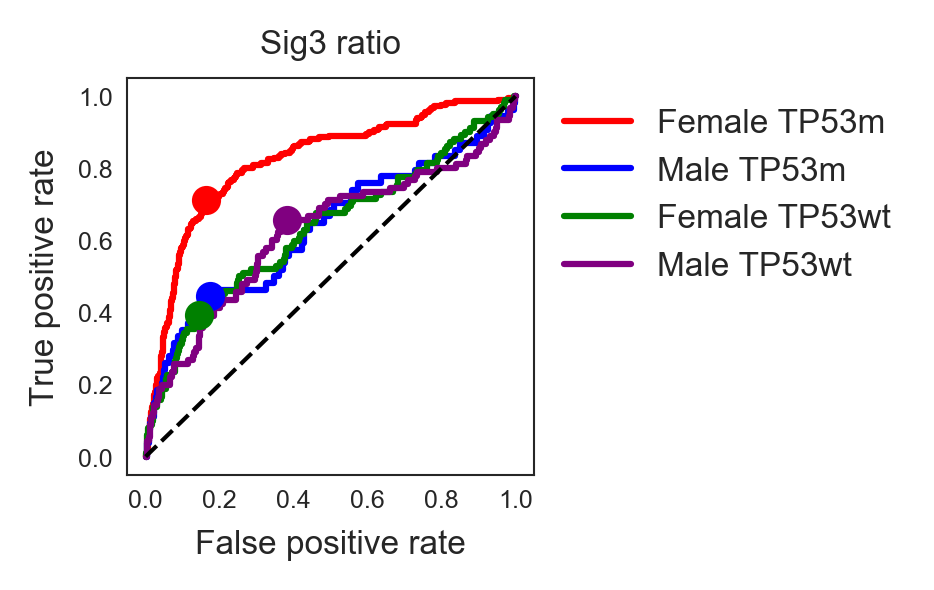

In [20]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']
colors=["red","blue","green","purple"]
cutoffs2,optimals2,aucs2,cis2=[],[],[],[]

fig=plt.figure(figsize=(1.75,1.75))
ax=fig.add_subplot(111)
for i,group in enumerate(groups) :
    plt_df2=plt_df[ plt_df["Gender_sTP53m"]==group]
    plt_df2=plt_df2.dropna(subset=["HA_cases","MSK_Sig3_ratio"])
    y_true=np.array(plt_df2["HA_cases"])
    y_score=np.array(plt_df2["MSK_Sig3_ratio"])
    w=[0.1 if x==0 else 0.9 for x in y_true ]
    fpr, tpr, thresholds = roc_curve(y_true, y_score,sample_weight=w )   
    auc = np.round( roc_auc_score(y_true, y_score),3)
    ci1,ci2 = np.round( roc_auc_ci(y_true, y_score),3 )
    ax.plot(fpr,tpr,c=colors[i],ls="-",label=labels[i])
    optimal_idx = np.argmax(tpr - fpr)
    optimals2.append( [fpr[optimal_idx],tpr[optimal_idx]] )
    cutoffs2.append( thresholds[optimal_idx])
    aucs2.append(auc)
    cis2.append( (ci1,ci2) )
    
ax.set_xlabel("False positive rate",fontsize=MEDIUM_SIZE)
ax.set_ylabel("True positive rate",fontsize=MEDIUM_SIZE)
ax.legend(bbox_to_anchor=(1, 1), fontsize=MEDIUM_SIZE,labels=labels)

for i,point in enumerate(optimals2):
    ax.plot( point[0],point[1],c=colors[i],marker="o")
ax.plot([0,1],[0,1],c="k",ls="--",lw=1)
ax.set_xticks( [0,0.2,0.4,0.6,0.8,1] )
ax.tick_params(labelsize=6)
ax.set_title("Sig3 ratio",fontsize=MEDIUM_SIZE)
plt.savefig(path_to_results+"Figure3C_2.png",bbox_inches="tight")

print(np.round(cutoffs2,3))
print(np.round(optimals2,3))
print(np.round(aucs2,3))
print(np.round(cis2,3))

In [22]:
table=pd.DataFrame({"Spearman coef":rSs,"Spearman pvalue":pvals,"HRD_cutoff":cutoffs,"HRD_AUC":aucs,"HRD_95%CI":cis,
                          "Sig3_cutoff":cutoffs2,"Sig3_AUC":aucs2,"Sig3_95%CI":cis2},index=labels)
table.to_csv(path_to_results+"Figure3D_table.tsv",sep="\t")
table

,Spearman coef,Spearman pvalue,HRD_cutoff,HRD_AUC,HRD_95%CI,Sig3_cutoff,Sig3_AUC,Sig3_95%CI
Female TP53m,0.481,5.30e-111,44.0,0.876,"(0.845, 0.907)",0.248863,0.819,"(0.784, 0.855)"
Male TP53m,0.122,2.19e-07,30.0,0.730,"(0.652, 0.808)",0.130999,0.629,"(0.548, 0.71)"
Female TP53wt,0.109,1.96e-09,18.0,0.874,"(0.829, 0.918)",0.178304,0.631,"(0.572, 0.69)"
Male TP53wt,0.025,1.79e-01,17.0,0.826,"(0.773, 0.879)",0.060565,0.621,"(0.559, 0.684)"
